In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

In [ ]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [ ]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

### Practice Scaling

In [ ]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

### Practice Normalization

In [ ]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

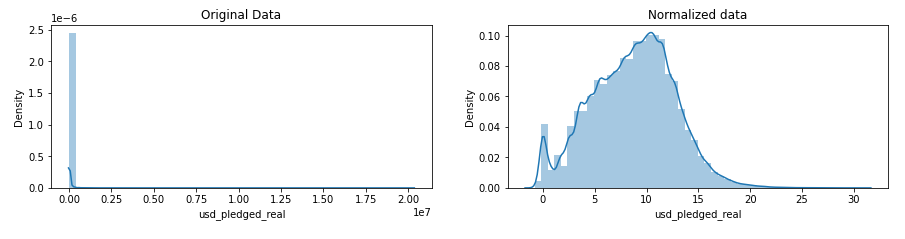

In [ ]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

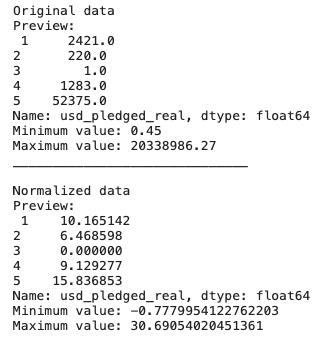